In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
df=pd.read_csv(r'../../data/AURN_data_download/Westminster/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'../../data/era5_data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [7]:
import normet.autodew as ad

In [8]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [9]:
automl=ad.train_model(df1a,value='value',variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                time_budget= 60,  metric= 'r2');

In [10]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: xgboost
Best model parameters: {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [11]:
automl.best_result

{'pred_time': 3.0955011375778387e-06,
 'wall_clock_time': 43.517821073532104,
 'metric_for_logging': {'pred_time': 3.0955011375778387e-06},
 'val_loss': 0.14506105728824534,
 'training_iteration': 1,
 'config': {'n_estimators': 80,
  'max_leaves': 179,
  'min_child_weight': 0.03469842703470486,
  'learning_rate': 0.09050333780681966,
  'subsample': 0.8788794424065157,
  'colsample_bylevel': 0.7372635897769984,
  'colsample_bytree': 0.9535003009271207,
  'reg_alpha': 0.09353166342028453,
  'reg_lambda': 3.6044671382295674},
 'config/n_estimators': 80,
 'config/max_leaves': 179,
 'config/min_child_weight': 0.03469842703470486,
 'config/learning_rate': 0.09050333780681966,
 'config/subsample': 0.8788794424065157,
 'config/colsample_bylevel': 0.7372635897769984,
 'config/colsample_bytree': 0.9535003009271207,
 'config/reg_alpha': 0.09353166342028453,
 'config/reg_lambda': 3.6044671382295674,
 'experiment_tag': 'exp',
 'time_total_s': 8.159311294555664}

In [12]:
automl.feature_importances_

array([0.0512452 , 0.09356024, 0.05020848, 0.07993569, 0.0396647 ,
       0.21618505, 0.05815253, 0.02513707, 0.02636059, 0.03911485,
       0.02288253, 0.1130693 , 0.15781933, 0.02666452], dtype=float32)

In [13]:
automl.feature_names_in_

array(['weekday', 'u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc',
       'tp', 'rh2m', 'date_unix', 'day_julian', 'hour'], dtype='<U10')

In [14]:
mod_stats=(pd.concat([ad.modStats(df1a,automl,set='testing'),
                ad.modStats(df1a,automl,set='training'),
                ad.modStats(df1a.assign(set="all"),automl,set='all')]))

In [15]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_value,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,0.0,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,0.0,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,0.0,0.821371,0.910685,0.962915,all


In [16]:
df1a

,rowid,date,tp,tcc,u10,blh,d2m,sp,v10,t2m,rh2m,ssrd,value,date_unix,day_julian,weekday,hour,set
0,0,2020-01-01 00:00:00,0.000008,0.650958,-2.720528,384.209053,277.183465,102252.303312,1.545010,278.394725,91.884130,-1.164153e-10,58.1,1.577837e+09,1,3,0,training
1,1,2020-01-01 01:00:00,0.000002,0.603699,-2.308789,353.220263,276.695430,102211.168636,1.282742,277.772899,92.715877,-1.164153e-10,43.2,1.577840e+09,1,3,1,training
2,2,2020-01-01 02:00:00,0.000005,0.710378,-2.216471,255.911846,276.505662,102174.855967,0.758730,277.463419,93.485560,-1.164153e-10,43.0,1.577844e+09,1,3,2,testing
3,3,2020-01-01 03:00:00,0.000005,0.837765,-1.928623,191.375560,276.412816,102166.786485,0.509013,277.305813,93.906363,-1.164153e-10,42.8,1.577848e+09,1,3,3,training
4,4,2020-01-01 04:00:00,0.000003,0.819103,-1.700043,151.780210,276.553051,102142.578039,0.607069,277.478941,93.696878,-1.164153e-10,36.8,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,2020-12-31 19:00:00,0.000000,0.918149,1.380939,476.945688,272.197565,99902.506413,-1.945195,273.557442,90.582979,-5.820766e-11,11.7,1.609441e+09,366,4,19,training
6369,6369,2020-12-31 20:00:00,0.000000,0.839639,0.987925,486.665851,272.171041,99947.625909,-2.102732,273.629146,89.939908,-5.820766e-11,11.0,1.609445e+09,366,4,20,training
6370,6370,2020-12-31 21:00:00,0.000000,0.739354,0.681543,489.355002,272.087408,100000.215520,-1.933668,273.470592,90.422188,-5.820766e-11,15.3,1.609448e+09,366,4,21,testing
6371,6371,2020-12-31 22:00:00,0.000000,0.643753,1.020793,40.714872,272.235319,100042.844978,-0.583816,272.926062,95.088677,-5.820766e-11,17.1,1.609452e+09,366,4,22,training


In [17]:
df_dew=ad.normalise(automl, df1a,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1)

<Axes: xlabel='date'>

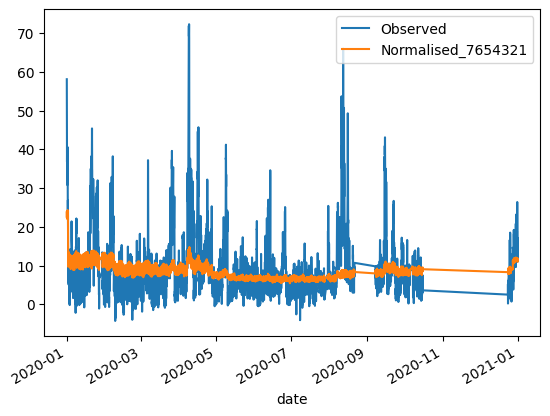

In [18]:
df_dew.plot()

In [19]:
df1.head()

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611


In [20]:
df_dew, mod_stats=ad.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=300)

<Axes: xlabel='date'>

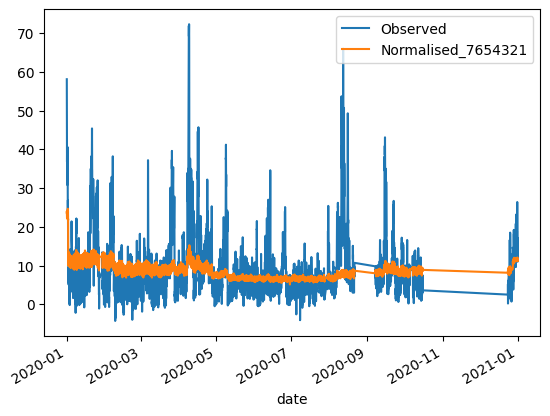

In [21]:
df_dew.plot()

In [22]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_value,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,0.0,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,0.0,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,0.0,0.821371,0.910685,0.962915,all


In [23]:
df_dew, mod_stats=ad.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=300,n_models=10)

In [24]:
df_dew

,Observed,Normalised_979812,Normalised_378829,Normalised_120727,Normalised_541475,Normalised_488292,Normalised_813334,Normalised_90992,Normalised_206312,Normalised_81536,Normalised_774600,mean,std,median,lower_bound,upper_bound,weighted
date,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,20.683573,15.458501,12.130141,14.164893,13.811130,13.353086,14.171614,23.631580,14.997868,13.752360,15.615474,3.629071,14.168253,12.405303,22.968279,15.144936
2020-01-01 01:00:00,43.2,19.990526,13.494690,12.709479,13.573306,14.086644,12.111499,13.467204,19.904009,14.170310,12.828829,14.633650,2.869183,13.533998,12.246044,19.971060,14.280088
2020-01-01 02:00:00,43.0,19.777561,14.010919,12.384985,13.076367,13.088352,11.421002,13.447265,21.469257,13.925427,14.036251,14.663739,3.266339,13.686346,11.637899,21.088626,14.417119
2020-01-01 03:00:00,42.8,19.176115,14.805120,13.148337,13.687832,11.997022,12.468013,12.924223,20.045937,13.354595,13.122697,14.472989,2.814284,13.251466,12.102995,19.850227,14.383744
2020-01-01 04:00:00,36.8,19.746719,14.169130,12.337375,14.643508,12.910254,11.762076,13.623596,21.055161,13.307068,13.259096,14.681398,3.139899,13.465332,11.891519,20.760761,14.435161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,12.889203,9.935672,9.458778,12.485026,10.665802,11.260665,10.141360,13.368443,10.404770,9.597568,11.020729,1.419146,10.535286,9.490006,13.260614,10.570256
2020-12-31 20:00:00,11.0,12.714019,9.892920,9.340041,12.878751,10.821051,10.835460,10.102044,12.987794,10.045538,9.953594,10.957121,1.384557,10.461548,9.464439,12.963259,10.535191
2020-12-31 21:00:00,15.3,13.056449,9.827380,9.460442,12.939261,10.816461,10.757772,9.719709,12.778439,9.600322,9.955551,10.891179,1.474256,10.356662,9.491915,13.030082,10.466730


# Time series decomposition

In [8]:
df_dewc, mod_stats=ad.ts_decom(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random',time_budget=60,
                  n_samples=100,fraction=0.75)

In [9]:
df_dewc

,Observed,all,date_unix,day_julian,weekday,hour,Deweathered
date,,,,,,,
2020-01-01 00:00:00,58.1,9.247956,20.786869,1.987686,0.529863,-0.668852,23.221674
2020-01-01 01:00:00,43.2,9.510674,20.607224,2.341211,0.788229,-0.722614,23.862873
2020-01-01 02:00:00,43.0,8.845603,20.158550,1.803162,0.747971,-0.620907,22.272528
2020-01-01 03:00:00,42.8,8.810212,21.327484,1.748756,0.454891,-0.756968,22.922527
2020-01-01 04:00:00,36.8,8.732007,20.761063,1.795383,0.552439,-0.913828,22.265215
...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.601645,9.747507,0.485749,0.037827,0.032633,11.243512
2020-12-31 20:00:00,11.0,9.153688,9.779181,0.852717,0.111848,-0.043662,11.191922
2020-12-31 21:00:00,15.3,8.826057,9.465727,1.271931,0.068032,-0.036762,10.933135


In [12]:
df_dewc, mod_stats=ad.met_decom(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,fraction=0.75, seed=7654321, n_cores=-1)

In [13]:
df_dewc

,Observed,all,blh,u10,d2m,sp,v10,t2m,tp,tcc,ssrd,rh2m
date,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,9.247956,-0.781821,2.389299,-1.744994,-0.520763,1.078839,-0.236872,0.255814,-0.497708,-0.696815,0.092048
2020-01-01 01:00:00,43.2,9.510674,-0.781694,2.197431,-0.943688,0.030581,1.408442,-0.312173,0.289780,0.034500,-0.946568,0.282545
2020-01-01 02:00:00,43.0,8.845603,2.348289,2.037642,-0.905240,-2.137806,0.645703,-0.322000,0.326756,0.744363,-0.519676,0.137220
2020-01-01 03:00:00,42.8,8.810212,3.202400,3.126856,-1.414152,-2.100265,0.429550,-0.717778,0.079400,0.559649,-0.480619,0.167610
2020-01-01 04:00:00,36.8,8.732007,3.455533,1.424604,-0.194036,-1.396873,0.294492,-0.249470,0.005179,0.905364,-0.414104,0.199018
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.601645,-1.022361,-0.677400,-0.387677,0.081874,-0.573958,-0.036602,0.064757,-0.075755,-0.460916,-0.553615
2020-12-31 20:00:00,11.0,9.153688,-1.169987,-0.270683,-0.729917,0.399334,-0.690880,0.162400,0.032992,-0.243564,-0.400839,-0.617838
2020-12-31 21:00:00,15.3,8.826057,-0.738710,-0.503219,-0.036490,0.017235,-0.723903,-0.012802,0.089635,-0.239981,-0.389915,-0.398773


# Rolling weather normalisation

In [14]:
df_dewc, mod_stats=ad.rolling_dew(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

In [15]:
df_dewc.head()

,Observed,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,...,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321,Normalised_7654321
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,17.029417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,18.292791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,17.315693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,17.808010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,17.257004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_dewc, mod_stats=ad.met_rolling(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321, n_cores=-1)

In [17]:
df_dewc.head()

,Observed,Normalised_7654321,EMI_mean_14,EMI_std_14,MET_short,MET_season
date,,,,,,
2020-01-01 00:00:00,58.1,23.221674,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,23.862873,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,22.272528,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,22.922527,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,22.265215,NaN,NaN,NaN,NaN
